In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

,x,y
0,0.496714,0
1,-0.138264,0
2,0.647689,0
3,1.523030,0
4,-0.234153,0


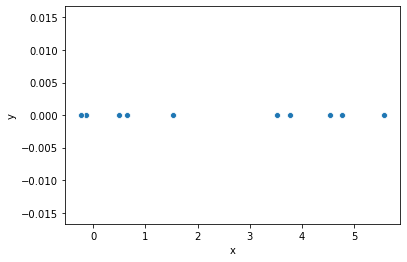

<IPython.core.display.Javascript object>

In [3]:
np.random.seed(42)
a = np.random.normal(0, 1, 5)
b = np.random.normal(4, 1, 5)

df = pd.DataFrame({"x": np.hstack((a, b))})
df["y"] = 0

display(df.head())

sns.scatterplot("x", "y", data=df)
plt.show()

* Choose `k` rows from the dataframe at random to be the initial centroids.
    * Note, that [other implementations](https://en.wikipedia.org/wiki/K-means%2B%2B) will do this a little more rigorously than `k` random points.
* Convert the centroids to a numpy array

In [8]:
k = 2

<IPython.core.display.Javascript object>

In [22]:
centroids = df.sample(k, random_state=21)
centroids = np.array(centroids)
centroids

array([[-0.1382643 ,  0.        ],
       [ 0.64768854,  0.        ]])

<IPython.core.display.Javascript object>

Here are where the centroids are located that we randomly selected

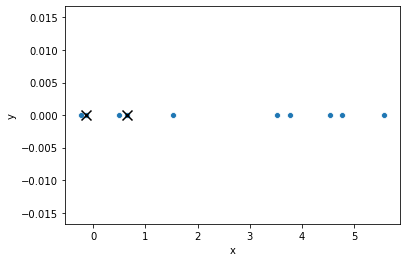

<IPython.core.display.Javascript object>

In [23]:
sns.scatterplot("x", "y", data=df)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, c="black")
plt.show()

We want to build towards a for loop to assign each point to a centroid.  For this, we'll use the sum of the squared differences (formula below).

$$\sum_{i=0}^{n}{(x_i - y_i)^2}$$

* $n$ is the total number of features
* $i$ is the current feature index
* $x_i$ is the current feature value for observation $x$
* $y_i$ is the current feature value for observation $y$

The below code chunks have the beginnings of logic we'll use in a `for` loop to compute euclidean distance between each row and each centroid.

In [24]:
X = np.array(df)

# create a variable named x
# put the first item from X in x
# this is to 'pretend' we're in the for loop
x = X[0]

<IPython.core.display.Javascript object>

In [25]:
# Take difference between x and centroids
diffs = x - centroids
diffs

array([[ 0.63497845,  0.        ],
       [-0.15097439,  0.        ]])

<IPython.core.display.Javascript object>

In [26]:
# Square the differences
sq_diffs = diffs ** 2
sq_diffs

array([[0.40319764, 0.        ],
       [0.02279326, 0.        ]])

<IPython.core.display.Javascript object>

In [29]:
# Sum the squared differences by row
dists = sq_diffs.sum(axis=1)
dists

array([0.40319764, 0.02279326])

<IPython.core.display.Javascript object>

In [30]:
# Find the index of the centroid closest to x
label = np.argmin(dists)
label

1

<IPython.core.display.Javascript object>

In [31]:
# Use all of the components you just made to build a for loop
# that assigns a label to each row of X
labels = []
for x in X:
    diffs = x - centroids
    sq_diffs = diffs ** 2
    dists = sq_diffs.sum(axis=1)
    label = np.argmin(dists)

    labels.append(label)

labels

[1, 0, 1, 1, 0, 1, 1, 1, 1, 1]

<IPython.core.display.Javascript object>

Add the assigned labels as a column in the below dataframe named `assigned_df`.

In [32]:
assigned_df = df.copy()
assigned_df["label"] = labels
assigned_df.head()

,x,y,label
0,0.496714,0,1
1,-0.138264,0,0
2,0.647689,0,1
3,1.523030,0,1
4,-0.234153,0,0


<IPython.core.display.Javascript object>

Replot the data with the points colored by cluster assignment

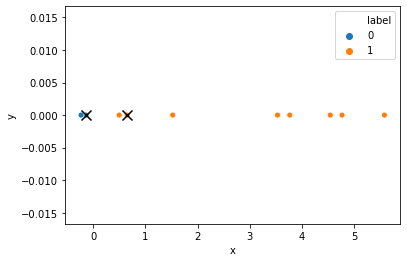

<IPython.core.display.Javascript object>

In [33]:
sns.scatterplot("x", "y", hue="label", data=assigned_df)
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=100)
plt.show()

Aggregate `assigned_df` to update the centroids.
* Group by the `'label'` column and take the mean of every other column.
* Convert this output to a numpy array and assign it to `centroids`

In [34]:
assigned_df.groupby("label").mean()

,x,y
label,,
0,-0.186209,0
1,3.106629,0


<IPython.core.display.Javascript object>

In [35]:
agg_df = assigned_df.groupby("label").mean()
centroids = np.array(agg_df)
centroids

array([[-0.18620884,  0.        ],
       [ 3.1066286 ,  0.        ]])

<IPython.core.display.Javascript object>

Replot the data colored by `'label'` with the new centroids.

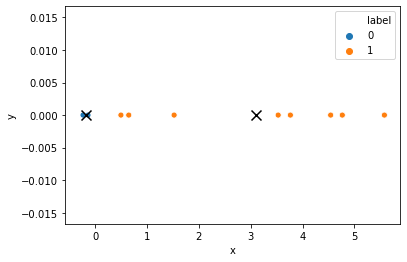

<IPython.core.display.Javascript object>

In [36]:
sns.scatterplot("x", "y", hue="label", data=assigned_df)
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=100)
plt.show()

The process we've been doing is rewritten as functions below.  Take a minute to read over the functions and confirm you understand the logic.

In [37]:
def init_centroids(df, k):
    centroids = df.sample(k).values
    return centroids

<IPython.core.display.Javascript object>

In [38]:
def assign_centroids(X, centroids):
    X = np.array(X)
    centroids = np.array(centroids)

    labels = []
    for x in X:
        diffs = x - centroids
        sq_diffs = diffs ** 2
        dists = np.sum(sq_diffs, axis=1)
        label = dists.argmin()
        labels.append(label)

    return labels

<IPython.core.display.Javascript object>

In [39]:
def update_centroids(assigned_df):
    centroid_agg = assigned_df.groupby("label").mean()
    centroids = centroid_agg.values
    return centroids

<IPython.core.display.Javascript object>

In [40]:
def plot_kmeans(df, centroids):
    sns.scatterplot("x", "y", hue="label", data=df)
    plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=100)
    plt.show()

<IPython.core.display.Javascript object>

Use the functions to: 
1. Initialize centroids
* Assign points to centroids
* Plot the current step
* Update centroids

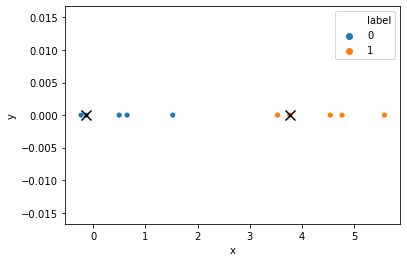

<IPython.core.display.Javascript object>

In [43]:
# Initialize centroids
centroids = init_centroids(df, k)

# Assign points to centroids
labels = assign_centroids(X, centroids)
assigned_df = df.copy()
assigned_df["label"] = labels

# Plot the current step
plot_kmeans(assigned_df, centroids)

# Update centroids
centroids = update_centroids(assigned_df)


Write a for loop to perform the assigning, plotting, and updating `n` times.

In [50]:
n = 4
centroids = init_centroids(df, 2)

<IPython.core.display.Javascript object>

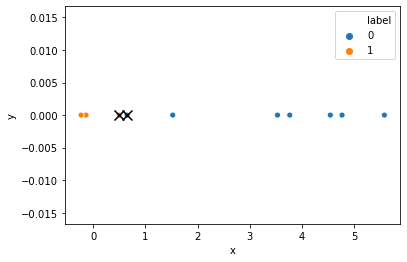

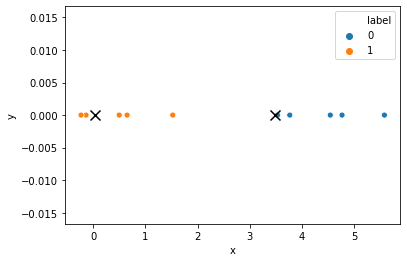

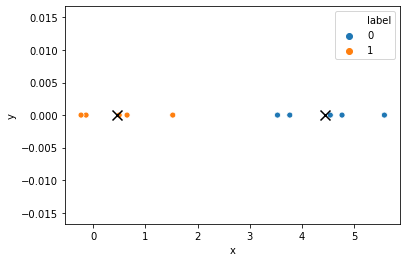

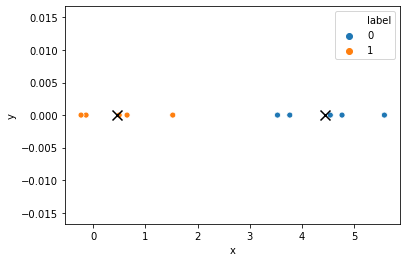

<IPython.core.display.Javascript object>

In [51]:
for _ in range(n):
    labels = assign_centroids(df, centroids)

    assigned_df = df.copy()
    assigned_df["label"] = labels

    plot_kmeans(assigned_df, centroids)
    centroids = update_centroids(assigned_df)

Boom! That's a bonified k-means algorithm.  For extra practice you might:
* Re-do the process with random `y` values instead of all 0s
    * The same code should work
* Re-do the process with a 3rd feature, `z`
    * The same code should work (i think), but the plotting will only show `x` and `y`
* Wrap the whole process up in a single function or class.  Feature requests below:
    * Give the user the option to turn plots on/off
    * Give the user the option to pass in a `random_state` that is used during centroid initialization
    * Give the user the option to specify a maximum number of iterations before the algorithm stops
    * Cause the algorithm to stop early if the centroids didn't change (i.e. it's converged)

Now let's do it the `sklearn` way.

In [66]:
data_url = "https://docs.google.com/spreadsheets/d/1RJrLftlRnj6gmrYewqxykVKSyl7aV-Ktd3sUNQILidM/export?format=csv"
startup = pd.read_csv(data_url)
startup = startup.drop(columns="State")
startup_og = startup.copy()
startup.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<IPython.core.display.Javascript object>

* Create a scaled version of the data with `StandardScaler()`
* Initialize a `KMeans` instance with `k` clusters.
* `.fit()` it to the `scaled` data

In [67]:
k = 4

<IPython.core.display.Javascript object>

In [68]:
# Scale the data
scaler = StandardScaler()

scaled = scaler.fit_transform(startup)
scaled

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         2.01120333e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.99942997e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         1.98084225e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         1.77662724e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         1.35774012e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         1.12724963e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.10548055e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         1.09620987e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01,
         1.00746967e+00],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01,
         9.46022467e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01,
         8.54846746e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01,
      

<IPython.core.display.Javascript object>

In [69]:
# Fit kmeans
k_means = KMeans(n_clusters=k)
k_means.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>

* Unscale the `clst.cluster_centers_` using your `StandardScaler` instance.  We do this for interpretation purposes; it's much easier to translate the numbers back in their original dollars and cents values.
* Save the unscaled centroids to a dataframe with the same names as the `startup` dataframe

In [70]:
k_means.cluster_centers_

array([[-0.9525584 , -1.25122965, -0.41188447, -0.97742101],
       [ 0.53476939,  0.23070113,  0.53735396,  0.49695817],
       [-0.61425754,  0.70987509, -0.98691077, -0.5631139 ],
       [ 1.67769275, -0.1728701 ,  1.61033659,  1.70884876]])

<IPython.core.display.Javascript object>

In [71]:
centroids = scaler.inverse_transform(k_means.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=startup.columns)
centroids_df.style.background_gradient()

,R&D Spend,Administration,Marketing Spend,Profit
0,30436.490000,86640.271818,161161.856364,73012.482727
1,98022.026111,127743.414444,276077.829444,131841.808333
2,45809.190667,141033.884000,91548.464667,89543.784667
3,149957.510000,116549.878333,405974.428333,180197.555000


<IPython.core.display.Javascript object>

* Interpret the output; try and give names to these clusters that represent their members
* Don't just look at the numbers; visualize the centroids somehow.  
    * A plot?
    * A formatted table?

In [ ]:
startup_og['labels'] = 